<a href="https://colab.research.google.com/github/TamizharasanG/Data-Augmentation_CNN/blob/main/Data_Augumentation_with_flowers_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Augumentation Flowers data set**

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, MaxPooling2D, Dense, Conv2D, Dropout
import pathlib

from sklearn.model_selection import train_test_split

In [2]:
data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin = data_url, cache_dir='.', untar=True )

228813984/228813984 [==============================] - 10s 0us/step


In [3]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [4]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [5]:
roses = list(data_dir.glob('roses/*'))
daisy = list(data_dir.glob("daisy/*"))
dandelion = list(data_dir.glob("dandelion/*"))
sunflowers = list(data_dir.glob("sunflowers/*"))
tulips = list(data_dir.glob("tulips/*"))

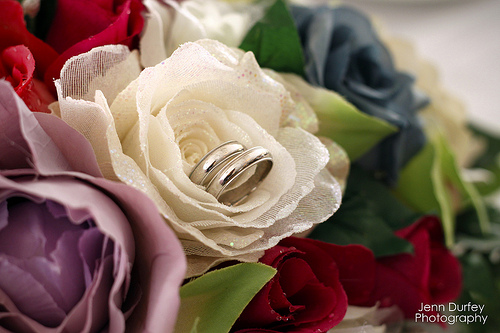

In [6]:
PIL.Image.open(str(roses[1]))

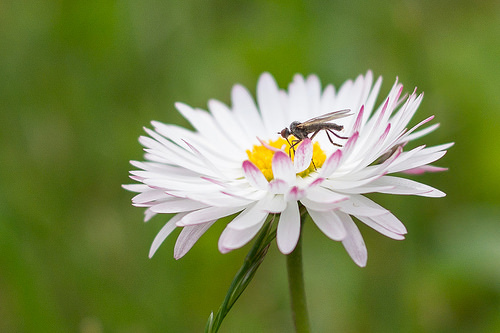

In [7]:
PIL.Image.open(str(daisy[1]))

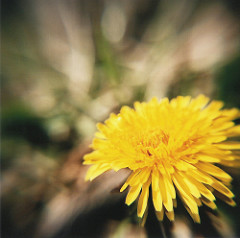

In [8]:
PIL.Image.open(str(dandelion[1]))

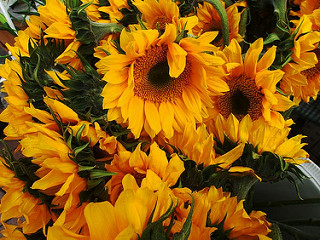

In [9]:
PIL.Image.open(str(sunflowers[1]))

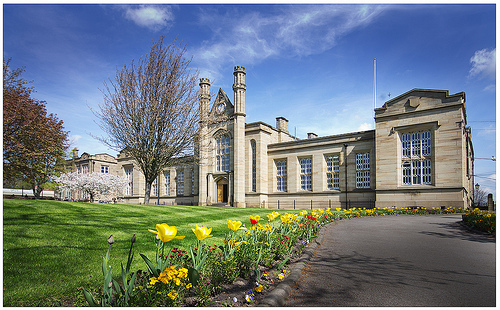

In [10]:
PIL.Image.open(str(tulips[2]))

In [11]:
flowers_dict = {
    "roses" : roses,
    "tulips" : tulips,
    "sunflowers" : sunflowers,
    "daisy" : daisy,
    "dandelion" : dandelion
    }

flower_classes = {
    "roses" : 0, 
    "daisy" : 1, 
    "dandelion" : 2,
    "sunflowers" : 3,
    "tulips" : 4
}

**cv2.imread(img_url)** -- >> This function is used to convert the image into the numpy array

In [12]:
img = cv2.imread(str(flowers_dict["dandelion"][10]))
#img

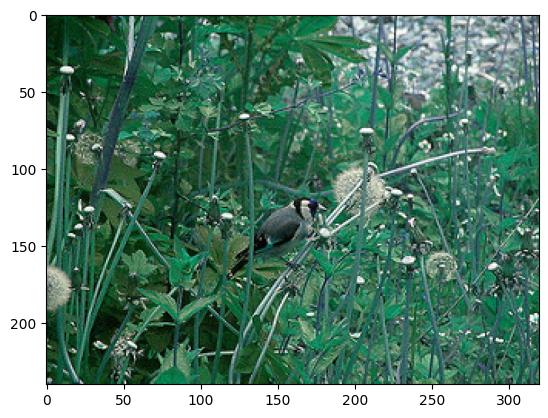

In [13]:

plt.imshow(img) 

**Finding the number of items in each class**

In [23]:
for i, j in flowers_dict.items():
  print(f"{i} --> {len(j)}")


roses --> 641
tulips --> 799
sunflowers --> 699
daisy --> 633
dandelion --> 898


**Converting all url's to numpy array and reshapig all images to the same size for better computation**

In [30]:
x, y = [], []
for i, j in flowers_dict.items():
  for image in j:
     img = cv2.imread(str(image))
     resized_image = cv2.resize(img, (100, 100))
     x.append(resized_image)
     y.append(flower_classes[i])

x = np.array(x)
y = np.array(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [34]:
len(X_train), len(X_test)

(2752, 918)

In [35]:
X_train = X_train / 255
X_test = X_test / 255

Model without **Data Augumentation** -->> This will give good accuracy for the train data and will give least accuracy for test data

In [43]:
model = Sequential()
model.add(Conv2D(16, 3, padding = "same", activation = "relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding = "same", activation = "relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding = "same", activation = "relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(5, activation = "softmax"))

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])


In [46]:
model.fit(X_train, y_train, validation_split = 0.3, epochs = 10)

Epoch 1/10
61/61 [==============================] - 12s 22ms/step - loss: 1.3549 - accuracy: 0.4097 - val_loss: 1.2619 - val_accuracy: 0.5024
Epoch 2/10
61/61 [==============================] - 1s 10ms/step - loss: 1.0641 - accuracy: 0.5909 - val_loss: 1.0212 - val_accuracy: 0.5920
Epoch 3/10
61/61 [==============================] - 1s 10ms/step - loss: 0.9137 - accuracy: 0.6433 - val_loss: 1.0191 - val_accuracy: 0.5872
Epoch 4/10
61/61 [==============================] - 1s 9ms/step - loss: 0.8105 - accuracy: 0.6890 - val_loss: 1.0424 - val_accuracy: 0.5835
Epoch 5/10
61/61 [==============================] - 1s 12ms/step - loss: 0.6923 - accuracy: 0.7420 - val_loss: 0.9749 - val_accuracy: 0.6320
Epoch 6/10
61/61 [==============================] - 1s 12ms/step - loss: 0.5907 - accuracy: 0.7923 - val_loss: 1.0520 - val_accuracy: 0.6150
Epoch 7/10
61/61 [==============================] - 1s 12ms/step - loss: 0.4471 - accuracy: 0.8411 - val_loss: 1.1232 - val_accuracy: 0.6247
Epoch 8/10
61

In [47]:
model.evaluate(X_test, y_test)

29/29 [==============================] - 0s 10ms/step - loss: 1.6627 - accuracy: 0.5817


[1.6627413034439087, 0.5816993713378906]

In [48]:
y_pred = model.predict(X_test)
y_pred_act = np.argmax(y_pred)

29/29 [==============================] - 0s 4ms/step


In [64]:
y_pred_act

2427

**Function for finding the progress of our model**

---




In [79]:
#Simple function for exploring the data  in the dataset with their classes
def plot_image_verify(x, y_test,y_pred, index):
  y_pred_act = []
  for i in y_pred:
    y_pred_act.append(np.argmax(i))
  plt.figure(figsize = (20, 4))
  plt.imshow(x[index])
  pred_ans = y_pred_act[index]
  Key_pred = [key for key, value in flower_classes.items() if value == pred_ans] 
  plt.title(f"Predicted Result : {Key_pred[0].title()}")
  act_ans = y_test[index]
  Key_act = [key for key, value in flower_classes.items() if value == act_ans] 
  plt.xlabel(f"Actual Result : {Key_act[0].title()}")

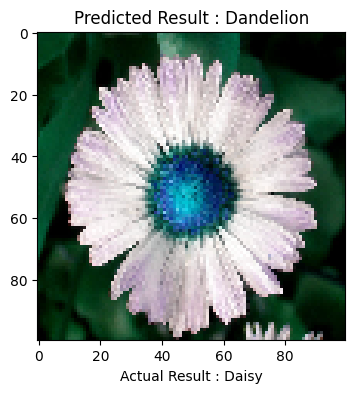

In [117]:
plot_image_verify(X_test, y_test, y_pred, 1)

**Model with Data Augumentation**

In [101]:
data_augmentation = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.3),
])

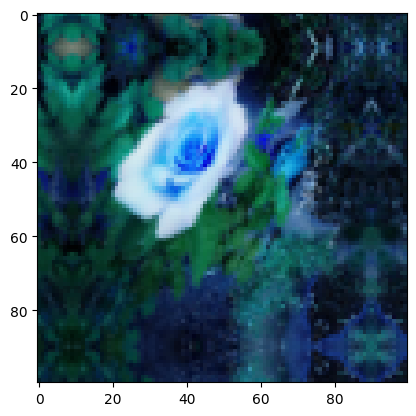

In [105]:
plt.imshow(data_augmentation(x)[10].numpy().astype("i8"))

In [118]:
model_new = Sequential()
model_new.add(data_augmentation)
model_new.add(Conv2D(16, 3, padding = "same", activation = "relu"))
model_new.add(MaxPooling2D())
model_new.add(Conv2D(32, 3, padding = "same", activation = "relu"))
model_new.add(MaxPooling2D())
model_new.add(Conv2D(64, 3, padding = "same", activation = "relu"))
model_new.add(MaxPooling2D())
model_new.add(Dropout(0.2))
model_new.add(Flatten())
model_new.add(Dense(128, activation = "relu"))
model_new.add(Dense(5, activation = "softmax"))

model_new.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

#Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model_new.fit(X_train, y_train, validation_split = 0.3, epochs = 100, callbacks = early_stopping)


Epoch 1/100
61/61 [==============================] - 4s 20ms/step - loss: 1.2926 - accuracy: 0.4356 - val_loss: 1.0872 - val_accuracy: 0.5545
Epoch 2/100
61/61 [==============================] - 1s 12ms/step - loss: 1.1007 - accuracy: 0.5597 - val_loss: 1.1480 - val_accuracy: 0.5363
Epoch 3/100
61/61 [==============================] - 1s 12ms/step - loss: 1.0272 - accuracy: 0.5919 - val_loss: 1.3534 - val_accuracy: 0.4964
Epoch 4/100
61/61 [==============================] - 1s 13ms/step - loss: 0.9672 - accuracy: 0.6277 - val_loss: 1.0642 - val_accuracy: 0.5920
Epoch 5/100
61/61 [==============================] - 1s 12ms/step - loss: 0.8983 - accuracy: 0.6443 - val_loss: 1.2532 - val_accuracy: 0.5315
Epoch 6/100
61/61 [==============================] - 1s 13ms/step - loss: 0.8424 - accuracy: 0.6672 - val_loss: 0.9123 - val_accuracy: 0.6550
Epoch 7/100
61/61 [==============================] - 1s 13ms/step - loss: 0.7955 - accuracy: 0.6906 - val_loss: 1.0030 - val_accuracy: 0.5944
Epoch 

In [119]:
model_new.evaluate(X_test, y_test)

29/29 [==============================] - 0s 7ms/step - loss: 1.0660 - accuracy: 0.6732


[1.0660357475280762, 0.673202633857727]

In [120]:
y_pred_new = model_new.predict(X_test)

29/29 [==============================] - 0s 4ms/step


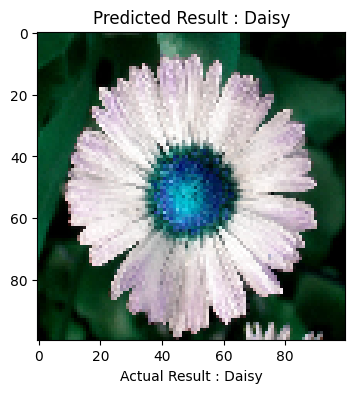

In [121]:
plot_image_verify(X_test, y_test, y_pred_new, 1)